<a href="https://colab.research.google.com/github/Sedkameni/IntroAI_Willis/blob/main/Sedrick_Lesson_7_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment Supervised machine Learning - Regression**

### **_House Price Prediction Using Bolton Housing Data_**
This dataset provides information about house prices in Bolton. House Price Prediction


**In this notebook, you'll follow the basic machine learning process to build a regression model to predict house prices using the "Boston Housing Dataset" from sklearn. The regression model will either be a Decision Tree or Random Forest regressor.**



---



### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a regression model.**


The following is a description of each column in the dataset:

Dataset Features (Bolton Housing):

* CRIM: Crime rate by town
* ZN: Proportion of residential land zoned for large lots
* INDUS: Proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: Nitric oxide concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built before 1940
* DIS: Weighted distances to five Boston employment centers
* RAD: Index of accessibility to radial highways
* TAX: Full-value property tax rate per `$10,000`
* PTRATIO: Pupil-teacher ratio by town
* B: Proportion of Black population
* LSTAT: Percentage of lower status of the population
* MEDV (Target): Median value of owner-occupied homes in `$1,000s`



**Dataset is from sklearn Datasets**

In [19]:
# --- Imports ---
# TODO: Import all the necessary libraries for data handling, visualization, and model building.
# Example: import pandas as pd
# Add your imports here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # For Decision Tree
from sklearn.ensemble import RandomForestRegressor  # For Random Forest
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, explained_variance_score
from joblib import dump, load

# Display settings
%matplotlib inline
sns.set(style="whitegrid")

In [6]:
# --- Data Collection and Loading ---
# TODO: Load the 'Boston Housing' dataset from sklearn and convert it into a pandas DataFrame.
# Hint: Use `load_boston()` from `sklearn.datasets`

# Load dataset and convert to DataFrame:

# Add your code here:
# from sklearn.datasets import load_boston
# boston = load_boston()
# df = pd.DataFrame(boston.data, columns=boston.feature_names)
# df['MEDV'] = boston.target


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(data, columns=feature_names)
df['MEDV'] = target

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-799010691.py:15: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [7]:
# --- Quick Check of Data ---
# TODO: Display the first few rows of the dataset to understand its structure.
# Hint: Use `.head()` to inspect the first few rows.

# Add your code here:
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# TODO: Check the features and target variable. Identify which is continuous and categorical if applicable.
# Hint: Use `.info()` and `.describe()` to inspect data types and statistical properties.

# Add your code here:
print("Diplay the informations on the dataset")
df.info()
print("Diplay the statistical properties of the dataset")
df.describe()

#Check continuous and cathegorical features
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Continuous features:", continuous_features)
print("Categorical features:", categorical_features)

Diplay the informations on the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
Diplay the statistical properties of the dataset
Continuous features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Categorical features: []


In [10]:
# --- EDA and Data Preprocessing ---
# TODO: Check for missing/null values.
# Hint: Use `.isnull().sum()` to check for null values.

# Add your code here:
print("Null values per column:")
print(df.isnull().sum())

# If very few missing values, show where
if df.isnull().values.any():
    print("\nRows with any nulls (first 5):")
    display(df[data.isnull().any(axis=1)].head())

# Fill missing numeric with median, categorical with most frequent
for c in continuous_features:
    if df[c].isnull().any():
        df[c] = df[c].fillna(df[c].median())

print("\nAfter fill, null counts:")
print(df.isnull().sum())

Null values per column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

After fill, null counts:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


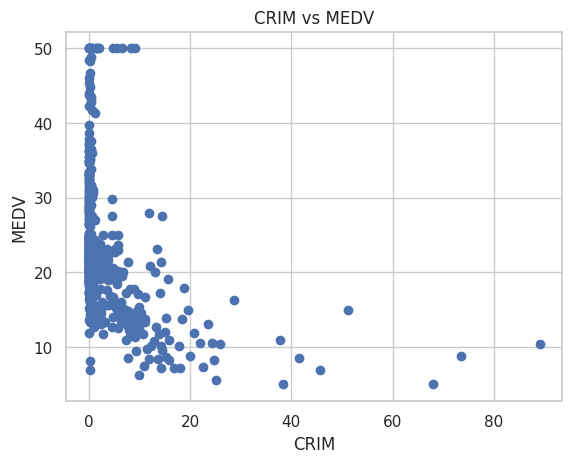

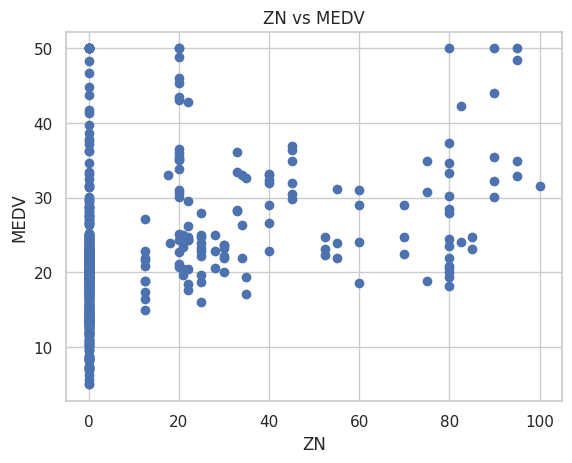

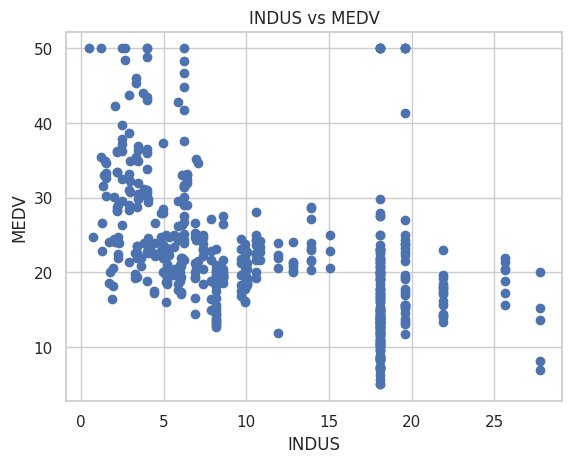

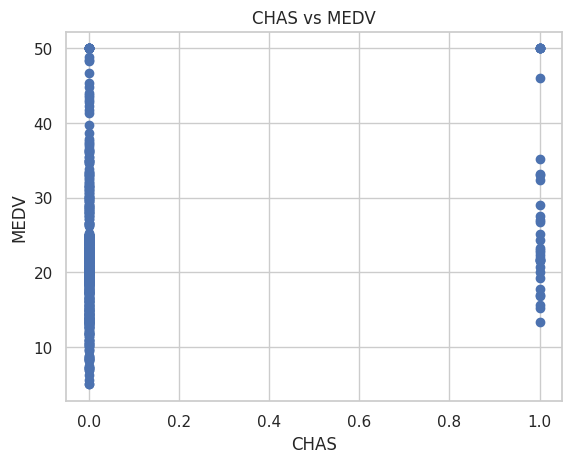

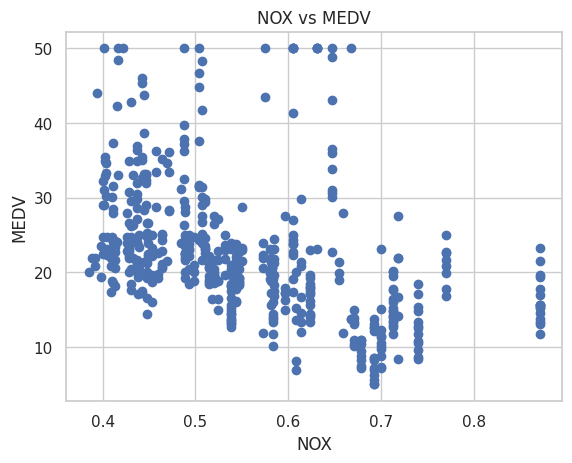

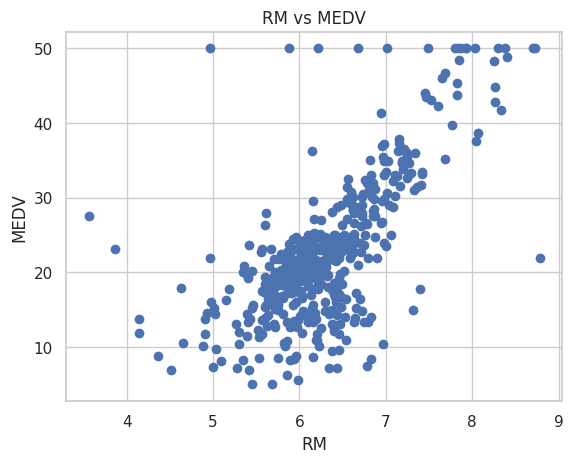

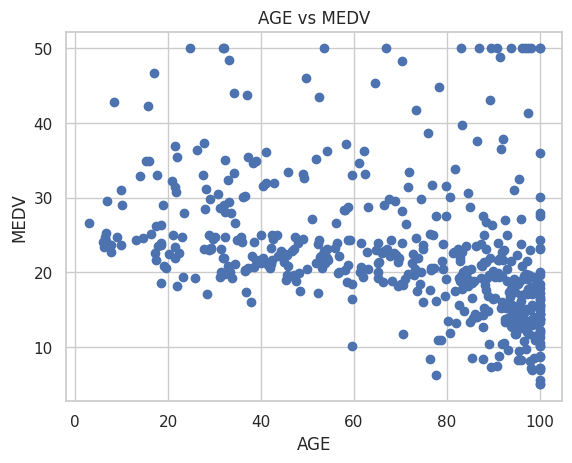

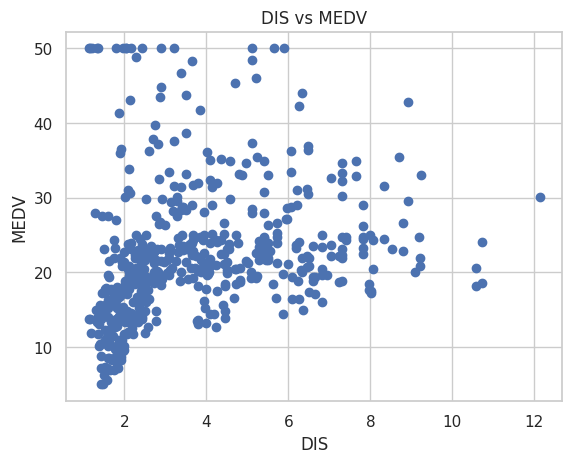

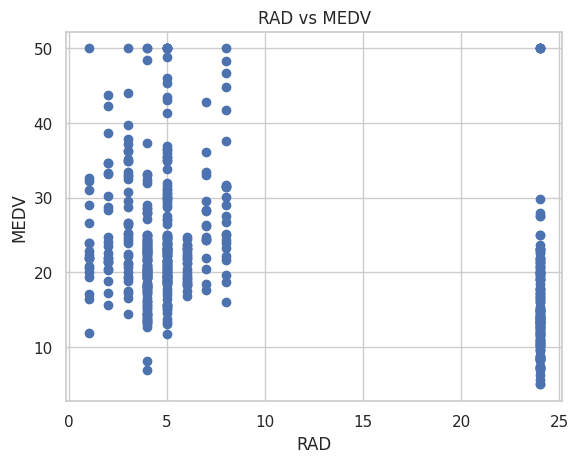

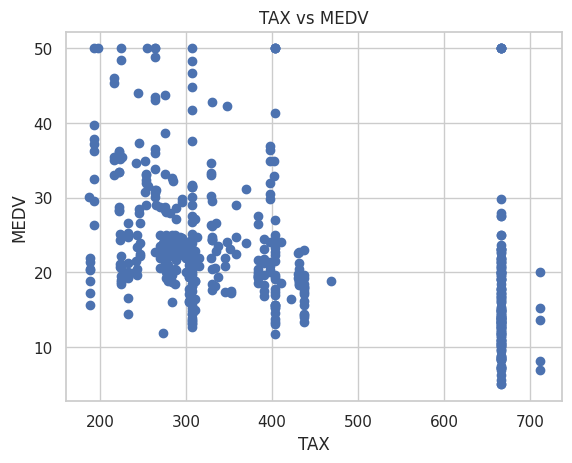

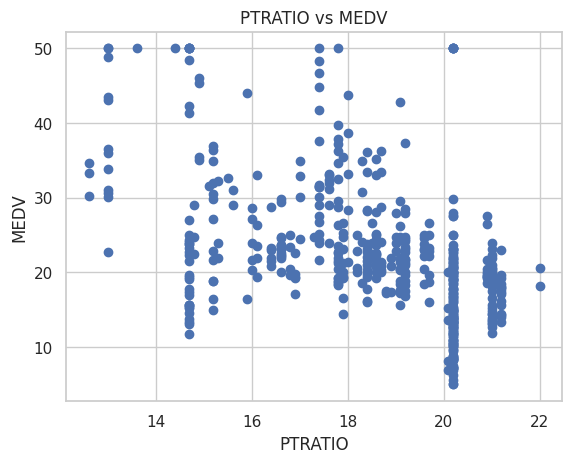

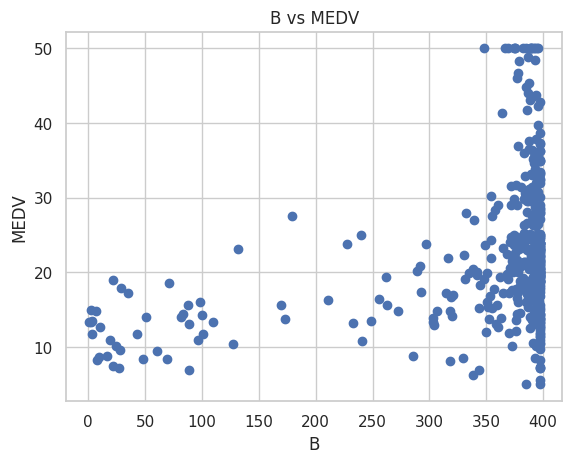

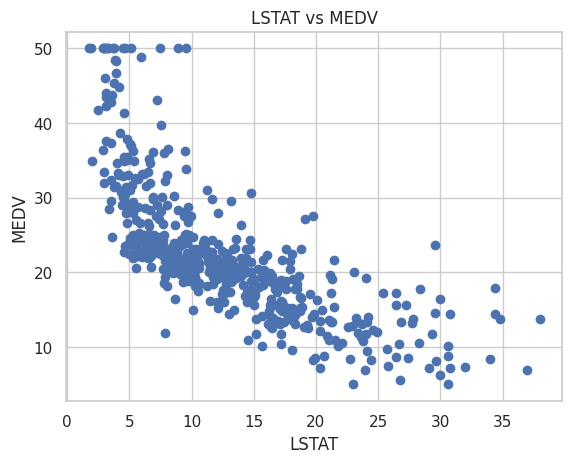

In [12]:
# TODO: Visualize the data. Create scatter plots to see the relationship between independent features and the target variable.
# Example: Use `plt.scatter()` to visualize the relationship between features like 'RM' (average number of rooms) and the target ('MEDV').

# Add your code here:
for col in feature_names:
    plt.figure()
    plt.scatter(df[col], df['MEDV'])
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.title(f'{col} vs MEDV')
    plt.show()

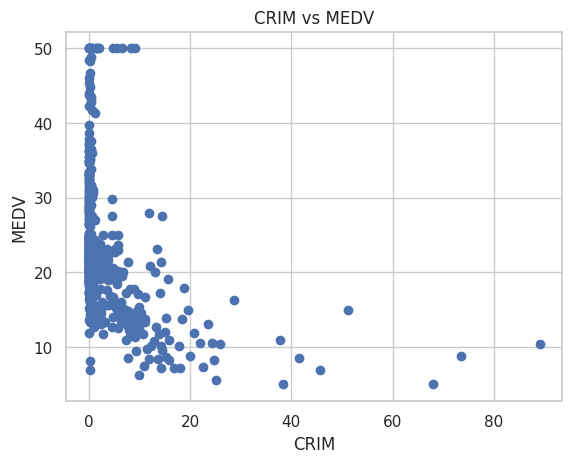

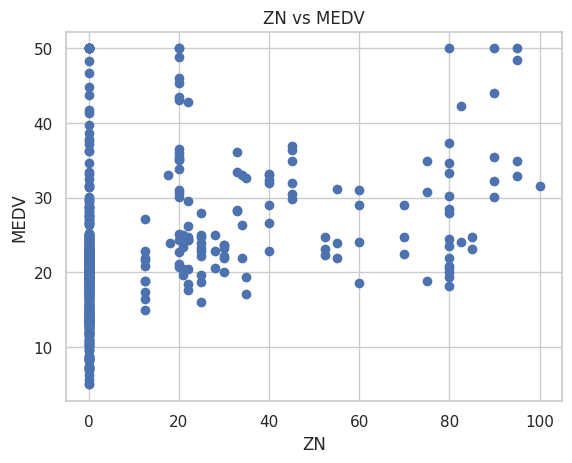

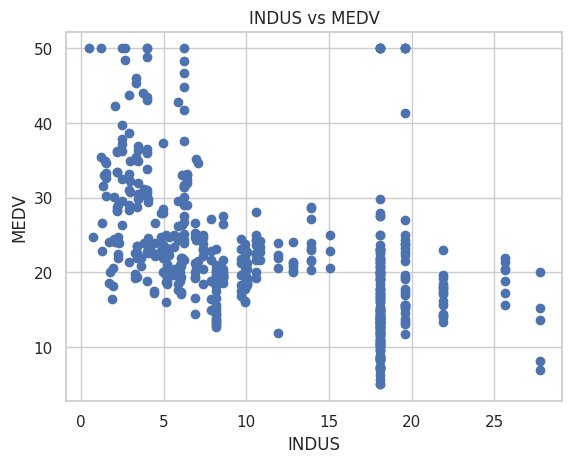

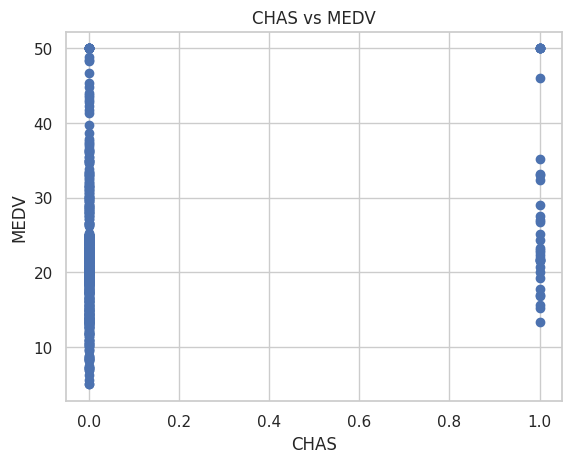

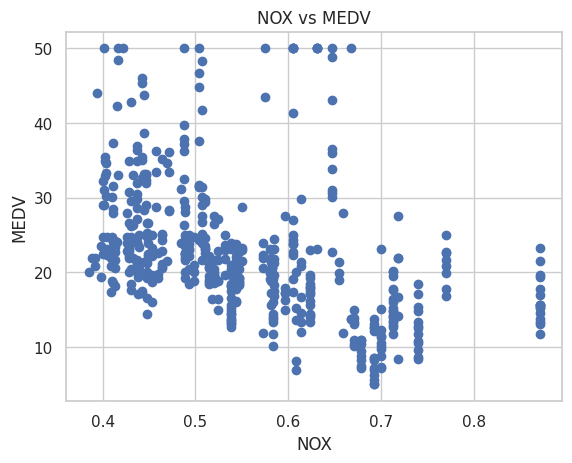

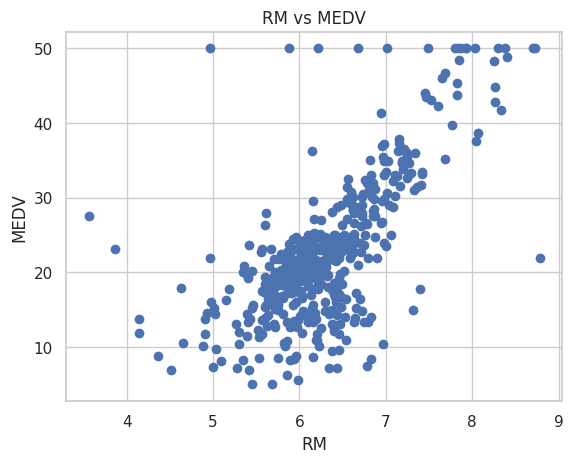

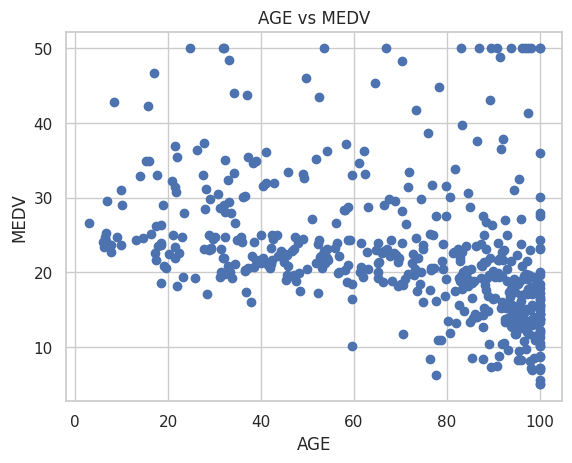

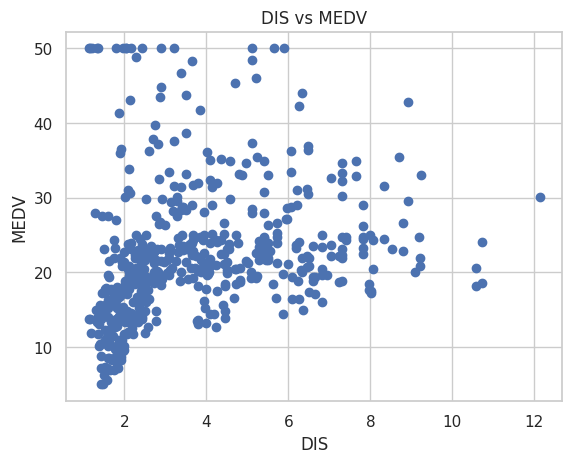

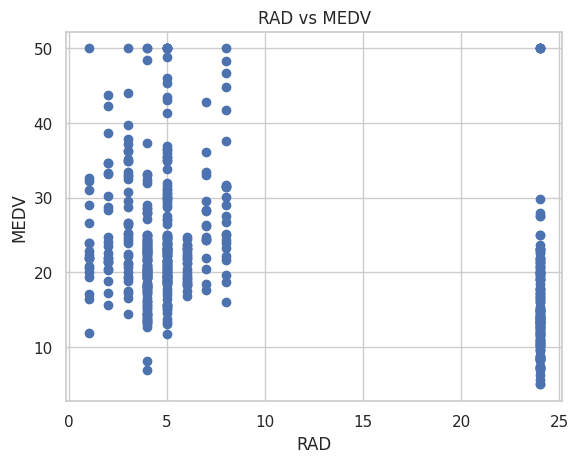

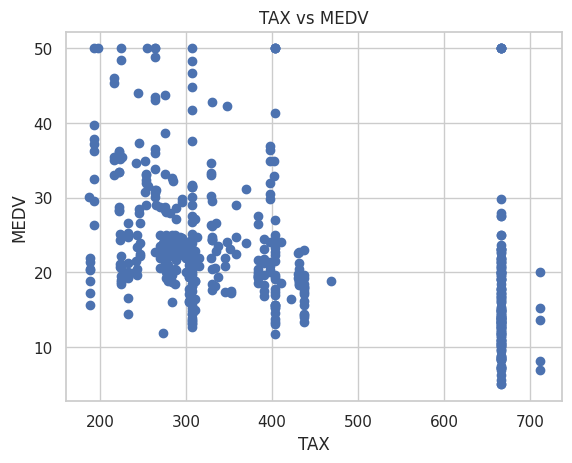

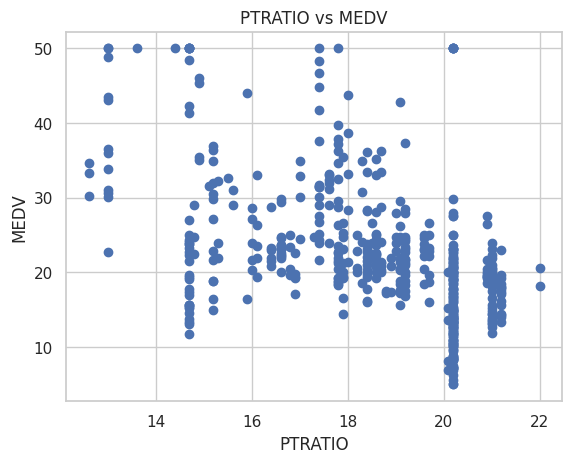

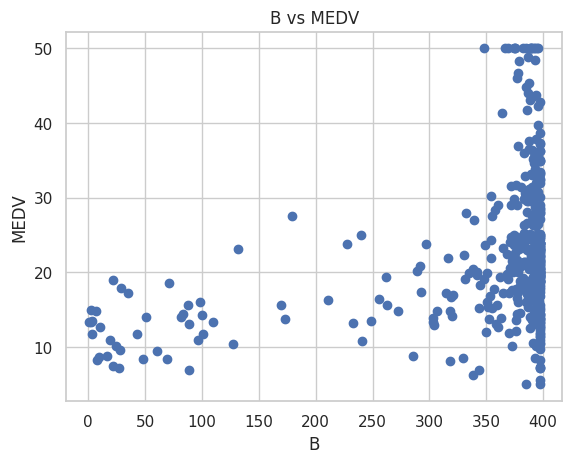

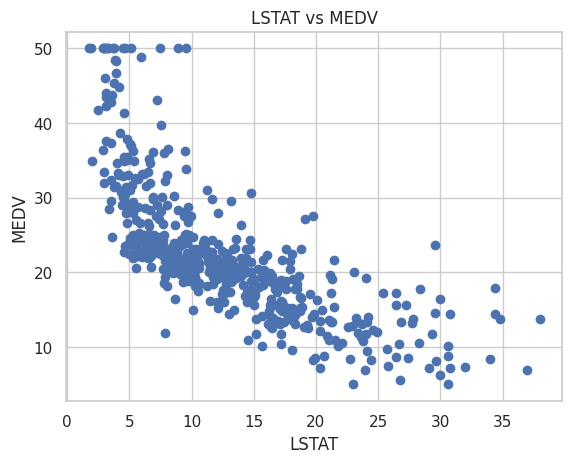

In [13]:
# TODO: Create a function to automate scatter plots for all features vs the target variable.
# Hint: The function should loop over a list of features and plot scatter plots for each.

# Define your function here:
def plot_feature_vs_target(df, target_col):

    features = [col for col in df.columns if col != target_col]  # exclude target

    for feature in features:
        plt.figure()
        plt.scatter(df[feature], df[target_col])
        plt.xlabel(feature)
        plt.ylabel(target_col)
        plt.title(f"{feature} vs {target_col}")
        plt.show()


# TODO: Use the function to visualize the relationships between multiple features and the target variable.
# Example: ['RM', 'LSTAT', 'AGE', 'CRIM']
# Target: 'MEDV'

# Add your code here:
plot_feature_vs_target(df, "MEDV")

In [17]:
# --- ML Model Training ---
# TODO: Split the dataset into training and testing sets.
# Hint: Use `train_test_split()` from `sklearn.model_selection` with an 80/20 split.
# Separates features (X) from target variable (y)

# Add your code here:
X = df.drop('MEDV', axis=1)
y = df['MEDV'].copy()

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)

# Define X (features) and y (target) and perform the train-test split:


# TODO: Choose an appropriate regression model: Decision Tree or Random Forest.
# Hint: Use either `` or `RandomForestRegressor` from `sklearn.tree` or `sklearn.ensemble`.

# Define your regression model here:
model = DecisionTreeRegressor()

# TODO: Train the model on the training data.
# Hint: Use `.fit()` to train the model.
# Train (fit) the model on the training data
model.fit(X_train, y_train)


Train size: (404, 13) Test size: (102, 13)


DecisionTreeRegressor()

Evaluation on test set:
R2 score: 0.8357
Explained variance: 0.8385
MAE: 2.6088
RMSE: 3.4709


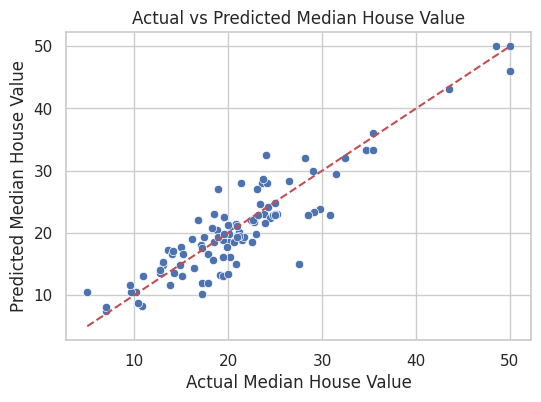

In [20]:
# --- Model Evaluation ---
# TODO: Evaluate the performance of the model on the test set using relevant metrics (e.g., RMSE, R-squared).
# Hint: Use `mean_squared_error()` and `r2_score()` from `sklearn.metrics`.
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained = explained_variance_score(y_test, y_pred)

print("Evaluation on test set:")
print(f"R2 score: {r2:.4f}")
print(f"Explained variance: {explained:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Value")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.show()

This code evaluates the performance of the trained regression model on the test set using several common metrics:

- `y_pred = model.predict(X_test)`: This line uses the trained `model` to predict the house prices (`y_pred`) for the features in the test set (`X_test`).
- `mse = mean_squared_error(y_test, y_pred)`: Calculates the Mean Squared Error (MSE), which measures the average of the squared differences between the actual and predicted values.
- `rmse = np.sqrt(mse)`: Calculates the Root Mean Squared Error (RMSE), which is the square root of the MSE. It provides an error metric in the same units as the target variable (house prices).
- `mae = mean_absolute_error(y_test, y_pred)`: Calculates the Mean Absolute Error (MAE), which measures the average of the absolute differences between the actual and predicted values. It is less sensitive to outliers than MSE or RMSE.
- `r2 = r2_score(y_test, y_pred)`: Calculates the R-squared score, which represents the proportion of the variance in the dependent variable (house prices) that is predictable from the independent variables (features). A higher R-squared indicates a better fit.
- `explained = explained_variance_score(y_test, y_pred)`: Calculates the Explained Variance Score, which measures how much of the variance in the target variable is explained by the model. It is similar to R-squared but is not affected by scaling of the target variable.
- The `print()` statements display the calculated evaluation metrics.
  * **Evaluation on test set:**
  * R2 score: 0.8357
  * Explained variance: 0.8385
  * MAE: 2.6088
  * RMSE: 3.4709
- The code then generates a scatter plot comparing the actual house prices (`y_test`) with the predicted house prices (`y_pred`). The diagonal red dashed line represents where the predicted values would exactly match the actual values. Points close to this line indicate good predictions.

In [ ]:
# Perform parameter tuning on the model if needed to improve the performance of your model.

# Add your parameter tuning code here:

# Predict on the test set and calculate the evaluation metrics:






# Perform parameter tuning on the Decision Tree Regressor model.

## Define parameter grid

#### Specify a range of hyperparameters to tune for the chosen model.



*Define the hyperparameter grid for the Decision Tree Regressor.*



In [21]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 20]
}

## Perform grid search with cross-validation

#### Use `GridSearchCV` to find the best combination of hyperparameters.


In [22]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 20}


## Train model with best parameters

#### Train the chosen model using the best hyperparameters found in the previous step.


**Reasoning**:
Train a new Decision Tree Regressor model using the best hyperparameters found by GridSearchCV and the training data.



In [23]:
best_params = grid_search.best_params_

# Instantiate a new Decision Tree Regressor model with the best parameters
best_model = DecisionTreeRegressor(**best_params)

# Train the new model with the best parameters on the training data
best_model.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=20)

## Evaluate tuned model

#### Evaluate the performance of the tuned model on the test set using relevant metrics.


**Reasoning**:
Evaluate the performance of the tuned model on the test set using relevant metrics and visualize the results.



Evaluation of Tuned Model on Test Set:
R2 score: 0.7408
Explained variance: 0.7408
MAE: 2.7529
RMSE: 4.3600


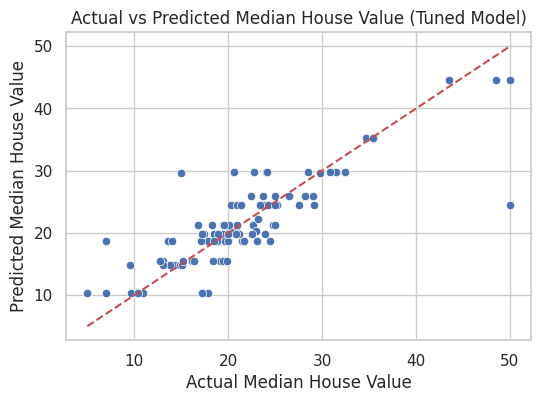

In [24]:
# Predict the target variable on the test set using the best_model
y_pred_tuned = best_model.predict(X_test)

# Calculate evaluation metrics
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
explained_tuned = explained_variance_score(y_test, y_pred_tuned)

# Print evaluation metrics
print("Evaluation of Tuned Model on Test Set:")
print(f"R2 score: {r2_tuned:.4f}")
print(f"Explained variance: {explained_tuned:.4f}")
print(f"MAE: {mae_tuned:.4f}")
print(f"RMSE: {rmse_tuned:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_tuned)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Value (Tuned Model)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.show()

## Summary:

### Data Analysis Key Findings

*   The best hyperparameters found through grid search for the Decision Tree Regressor were `{'max_depth': None, 'min_samples_leaf': 20}`.
*   The tuned Decision Tree Regressor model achieved an R-squared score of 0.7408 and an Explained Variance score of 0.7408 on the test set.
*   The evaluation metrics for the tuned model on the test set were MAE of 2.7529 and RMSE of 4.3600.

### Insights or Next Steps

*   The R-squared and Explained Variance scores of around 0.74 suggest that the tuned model explains a reasonable portion of the variance in house prices, but there is still room for improvement.
*   Comparing the performance of the tuned Decision Tree Regressor with other regression models could provide insight into whether this model is the most suitable choice for this dataset.


In [26]:
# --- Model Prediction ---
# TODO: Predict house prices from a new set of feature inputs.
# Example new data: Use hypothetical or randomly generated values for the features.
#
# Example new data: CRIM = 0.2, ZN = 12.5, INDUS = 7.07, CHAS = 0, NOX = 0.5, RM = 6.5, AGE = 68, DIS = 4.0, RAD = 2, TAX = 250, PTRATIO = 17, B = 400, LSTAT = 12

# Add your prediction code here:

# Create a new data point with hypothetical values
new_data = {
    'CRIM': [0.2],
    'ZN': [12.5],
    'INDUS': [7.07],
    'CHAS': [0],
    'NOX': [0.5],
    'RM': [6.5],
    'AGE': [68],
    'DIS': [4.0],
    'RAD': [2],
    'TAX': [250],
    'PTRATIO': [17],
    'B': [400],
    'LSTAT': [12]
}

new_df = pd.DataFrame(new_data)

# Predict the house price using the tuned model
predicted_price = best_model.predict(new_df)

print(f"Predicted house price: ${predicted_price[0]*1000:.2f}")

Predicted house price: $19879.31


## Summary:

### Data Analysis Key Findings

* The best hyperparameters found through grid search for the Decision Tree Regressor were `{'max_depth': None, 'min_samples_leaf': 20}`.
* The tuned Decision Tree Regressor model achieved an R-squared score of 0.7408 and an Explained Variance score of 0.7408 on the test set.
* The evaluation metrics for the tuned model on the test set were MAE of 2.7529 and RMSE of 4.3600.

### Insights or Next Steps

* The R-squared and Explained Variance scores of around 0.74 suggest that the tuned model explains a reasonable portion of the variance in house prices, but there is still room for improvement.
* Comparing the performance of the tuned Decision Tree Regressor with other regression models could provide insight into whether this model is the most suitable choice for this dataset.
* Further hyperparameter tuning or exploring other regression algorithms like Random Forest could potentially improve the model's performance.